In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime

In [21]:
earthquakes = pd.read_csv('catalog.csv')

In [22]:
earthquakes['date'].head()

0     3/2/2007
1    3/22/2007
2     4/6/2007
3    4/14/2007
4    4/15/2007
Name: date, dtype: object

In [23]:
date_length = earthquakes.date.str.len()
date_length.value_counts()

date
9.0     1075
8.0      368
10.0     247
Name: count, dtype: int64

In [24]:
indices = np.where([date_length == 10])[1]
print('Indices with corrupted data:', indices[:5])
earthquakes.loc[indices[:5]]

Indices with corrupted data: [44 45 46 47 48]


,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
44,301,10/11/2007,NaN,NaN,Costa Rica,CR,Alajuela,7014,Atenas,3.08459,...,"(9.9869000000000003, -84.406999999999996)",Landslide,Mudslide,Large,Rain,NaN,NaN,14.0,"Agence France-Presse, afp.google.com",http://afp.google.com/article/ALeqM5hu6a8oyAM1...
45,302,10/11/2007,NaN,NaN,Costa Rica,CR,San José,26669,NaN,9.56251,...,"(10.0214, -83.945099999999996)",Landslide,Landslide,Large,Rain,NaN,NaN,10.0,International Herald,http://www.iht.com/articles/ap/2007/10/12/amer...
46,303,10/12/2007,NaN,NaN,Haiti,HT,Ouest,3951,Cabaret,0.51272,...,"(18.733499999999999, -72.413300000000007)",Landslide,Complex,Large,Rain,NaN,NaN,23.0,Euronews.net,http://www.euronews.net/index.php?page=info&ar...
47,304,10/12/2007,NaN,NaN,Jamaica,JM,St. Elizabeth,1371,Maggotty,4.57363,...,"(18.125699999999998, -77.740499999999997)",Landslide,Complex,Medium,Rain,NaN,NaN,NaN,RadioJamaica,http://www.radiojamaica.com/content/view/2039/26/
48,307,10/13/2007,NaN,SA,Colombia,CO,Cauca,9985,Suárez,8.46579,...,"(2.9437000000000002, -76.771900000000002)",Landslide,Mudslide,Large,Continuous rain,NaN,NaN,24.0,Reuters - AlertNet.org,http://www.reuters.com/article/newsOne/idUSN13...


In [25]:
earthquakes['date_parsed'] = pd.to_datetime(earthquakes['date'], format = '%m/%d/%Y')

In [26]:
earthquakes['day'] = earthquakes['date_parsed'].dt.day
day_of_month_earthquakes = earthquakes['day']
# print(day_of_month_earthquakes)
# print(earthquakes.head())

C:\Users\ftstc\anaconda3\envs\lis875\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


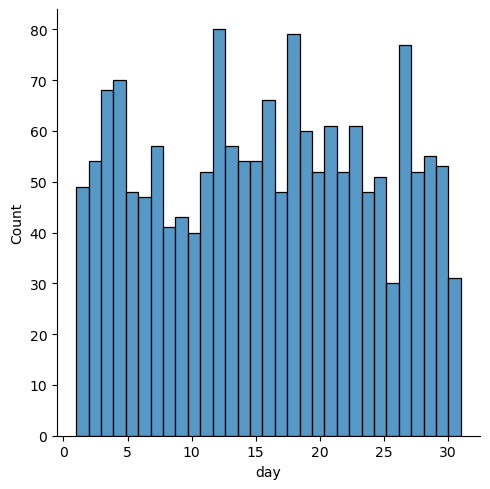

In [27]:
sns.displot(day_of_month_earthquakes, bins = 31)
# sns.histplot(day_of_month_earthquakes)

In [28]:
earthquakes.to_csv('catalog_cleaned.csv', index = False)